<a href="https://colab.research.google.com/github/JasOlean/LearnPytorch/blob/main/exercises/JH_03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

1.12.0+cu113


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision 
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
# get train dataset 
train_data = datasets.MNIST(root='.',
                            train = True,
                            download = True,
                            transform = transforms.ToTensor())

#get test dataset 
test_data = datasets.MNIST(root='.',
                           train=False,
                           download = True,
                           transform=transforms.ToTensor())

In [ ]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 5)

Image shape: torch.Size([1, 28, 28]), Label: 5


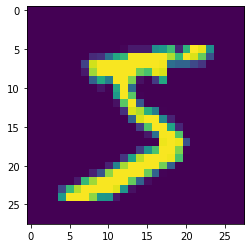

In [ ]:

# for tuple data (image, label)
img , label = train_data[0][0], train_data[0][1]
plt.imshow(img.squeeze()) 
print(f'Image shape: {img.shape}, Label: {label}')

In [ ]:
# get the class names from the dataset 
class_names = train_data.classes 
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

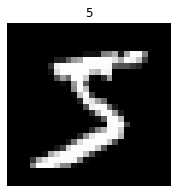

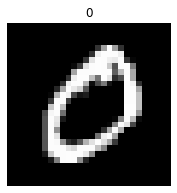

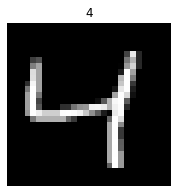

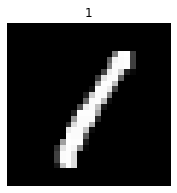

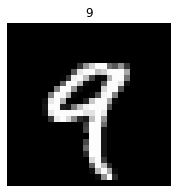

In [ ]:
# visualize samples 
for i in range(5):
  img = train_data[i][0]
  label = train_data[i][1]
  plt.figure(figsize=(3,3))
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32 

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = batch_size,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = batch_size,
                             shuffle = False)
train_dataloader, test_dataloader                             

(<torch.utils.data.dataloader.DataLoader at 0x7f84d09c2d50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f84d09c2b50>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch.nn.modules import padding
# create model
import torch.nn as nn 

class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, 
                  out_channels = hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding= 1),
        nn.ReLU(),                  
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units,3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features = output_shape)
    )

  def forward(self,x):
    x = self.conv_layer1(x)
    x = self.conv_layer2(x)
    x = self.classifier_layer(x)
    return x


In [ ]:
device 

'cpu'

In [ ]:
model_cpu = MNISTModelV0(input_shape = 1,
                     output_shape = len(class_names),
                     hidden_units=10).to(device)
model_cpu                   

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
%%time 
from tqdm.auto import tqdm 

model_cpu = MNISTModelV0(input_shape = 1,
                     output_shape = len(class_names),
                     hidden_units=10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer  = torch.optim.SGD(params=model_cpu.parameters(), lr = 0.1)
epochs = 5 
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_cpu.train()
    X,y = X.to(device), y.to(device)

    y_pred = model_cpu(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  train_loss /= len(train_dataloader)

  ## testing loop 
  test_loss_total = 0
  model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device) 

      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss 

    test_loss_total /= len(test_dataloader)  
  # print out 
  print(f'Epoch: {epoch}  | Loss: {train_loss:.3f}  | Test Loss: {test_loss:.3f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0  | Loss: 0.280  | Test Loss: 0.001
Epoch: 1  | Loss: 0.071  | Test Loss: 0.007
Epoch: 2  | Loss: 0.056  | Test Loss: 0.002
Epoch: 3  | Loss: 0.047  | Test Loss: 0.001
Epoch: 4  | Loss: 0.041  | Test Loss: 0.001
CPU times: user 4min 10s, sys: 12.9 s, total: 4min 23s
Wall time: 4min 23s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

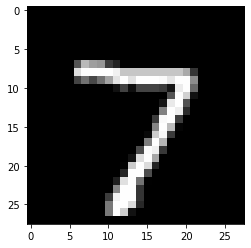

In [ ]:
# make predictions 
plt.imshow(test_data[0][0].squeeze(),cmap='gray')

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


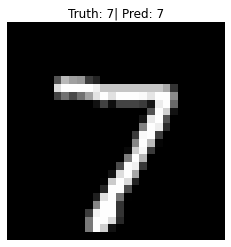

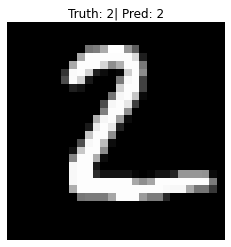

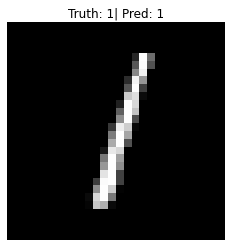

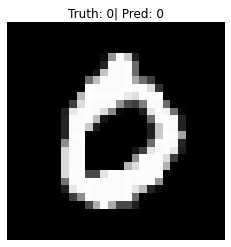

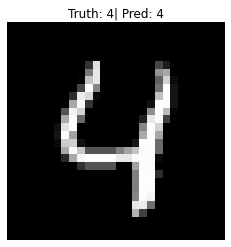

In [ ]:
model_cpu.eval() 
num_to_plot = 5 
for i in range(num_to_plot):
  img = test_data[i][0]
  label = test_data[i][1]
  print(img.shape)

  pred_logits = model_cpu(img.unsqueeze(dim=0).to(device))
  pred_label = torch.softmax(pred_logits,dim=1).argmax(dim=1)

  plt.figure()
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(f'Truth: {label}| Pred: {pred_label.item()}')
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
try: 
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be 19 or higher'
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')


     |████████████████████████████████| 419 kB 14.6 MB/s 
     |████████████████████████████████| 1.3 MB 70.9 MB/s 
mlxtend version: 0.20.0


In [ ]:
from tqdm.auto import tqdm 
model_cpu.eval() 
y_preds = []
with torch.inference_mode():
  for  batch, (X,y) in tqdm(enumerate(test_dataloader)):
    X,y = X.to(device), y.to(device)
    y_pred_logits = model_cpu(X)
    y_pred_labels = torch.softmax(y_pred_logits,dim=1).argmax(dim=1)

    y_preds.append(y_pred_labels)
  y_preds = torch.cat(y_preds)
len(y_preds)

0it [00:00, ?it/s]

10000

In [ ]:
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names))
confmat_tensor = confmat(preds = y_preds,
                         target=test_data.targets)
confmat_tensor

tensor([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
        [   0, 1129,    1,    4,    0,    0,    0,    1,    0,    0],
        [   2,    2, 1017,    1,    1,    0,    1,    4,    4,    0],
        [   0,    0,    1, 1008,    0,    1,    0,    0,    0,    0],
        [   1,    1,    4,    0,  970,    0,    1,    1,    1,    3],
        [   0,    0,    0,   10,    0,  880,    1,    1,    0,    0],
        [   3,    2,    0,    0,    3,    4,  945,    0,    1,    0],
        [   0,    2,    5,    5,    0,    0,    0, 1014,    1,    1],
        [   5,    0,    5,    6,    1,    2,    2,    0,  951,    2],
        [   5,    3,    1,    1,    5,    5,    0,    5,    3,  981]])

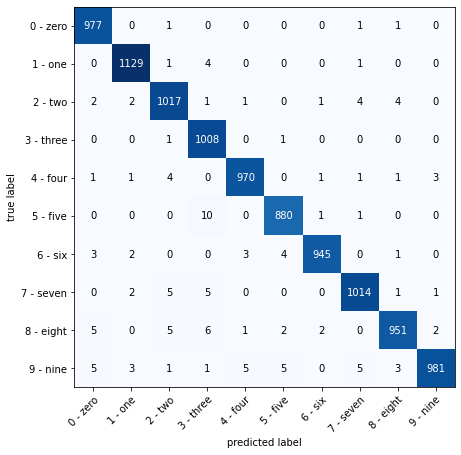

In [ ]:
# plot the confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names  = class_names,
                                figsize = (10,7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
# create a random tensor 
random_tensor = torch.randn([1,1,28,28])
random_tensor.shape

torch.Size([1, 1, 28, 28])

In [ ]:
conv_layer = nn.Conv2d(in_channels = 1,
                       out_channels = 10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
max_pool_layer = nn.MaxPool2d(2,2)
print(f'Shape before through conv layer: {random_tensor.shape}')
random_tensor_through_conv = conv_layer(random_tensor)
print(f'Shape after through conv_layer: {random_tensor_through_conv.shape}')
random_tensor_through_max_pool = max_pool_layer(random_tensor_through_conv)
print(f'Shape after throgh max pool layer: {random_tensor_through_max_pool.shape}')

Shape before through conv layer: torch.Size([1, 1, 28, 28])
Shape after through conv_layer: torch.Size([1, 10, 28, 28])
Shape after throgh max pool layer: torch.Size([1, 10, 14, 14])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# import dataset 
import torchvision
from torchvision import transforms
from torchvision.datasets import FashionMNIST 
import matplotlib.pyplot as plt

train_fashion_data = FashionMNIST(root = '.',
                                  train = True,
                                  download=True,
                                  transform= transforms.ToTensor())
    
test_fashion_data = FashionMNIST(root = '.',
                                 train = False,
                                 download = True,
                                 transform=transforms.ToTensor())

train_fashion_data, test_fashion_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
train_fashion_data[0][0].shape, train_fashion_data[0][1]

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_names = test_fashion_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

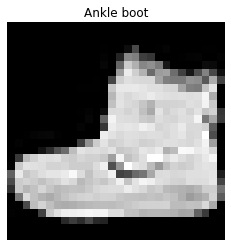

In [ ]:
#visualize train data at least one
img, label = train_fashion_data[0][0], train_fashion_data[0][1]
plt.imshow(img.squeeze(), cmap= 'gray')
plt.title(class_names[label])
plt.axis(False)

In [ ]:
# Put dataset to DataLoader to set mini batches 
from torch.utils.data import DataLoader
batch_size = 32
train_fashion_dataloader = DataLoader(dataset=train_fashion_data,
                                      batch_size = batch_size,
                                      shuffle = True)
test_fashion_dataloader = DataLoader(dataset= test_fashion_data,
                                     batch_size = batch_size,
                                     shuffle = False)
train_fashion_dataloader, test_fashion_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f84b89bed90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f84b8f0fed0>)

In [ ]:
len(train_fashion_dataloader), len(test_fashion_dataloader)

(1875, 313)

In [ ]:
# Create Model for FashionMNIST dataset 
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )
  
  def forward(self,x):
    x = self.conv_layer1(x)
    x = self.conv_layer2(x)
    x = self.classifier_layer(x) 
    return x 


In [ ]:
model_1 = FashionMNISTModelV1(input_shape=1,
                              output_shape=len(class_names),
                              hidden_units = 10).to(device)
model_1                              

FashionMNISTModelV1(
  (conv_layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_1.state_dict()

In [ ]:
# setup loss function and optimizer for train and test loop
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [ ]:
# call helper_functions.py from github repo
import requests 
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already existed. Skipping download...')
else:
  request = requests.get('https://raw.githubusercontent.com/JasOlean/LearnPytorch/main/helper_functions.py')
  with open('helper_functions.py','wb') as file:
    file.write(request.content)

helper_functions.py already existed. Skipping download...


In [ ]:
# load accuracy function from helper_functions.py 
#from helper_functions import accuracy_fn 

#load accuracy_fn from torchmetrics lib 
from torchmetrics import Accuracy 

accuracy_fn = Accuracy(num_classes = len(class_names)) 
accuracy_fn

Accuracy()

In [ ]:
from tqdm.auto import tqdm
# Training setting 
torch.manual_seed(42) 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

epochs = 5 

for epoch in tqdm(range(epochs)):
  train_loss, train_acc = 0, 0
  test_loss_total , test_acc = 0, 0
  model_1.train()
  for batch, (X,y) in enumerate(train_fashion_dataloader):
    X, y = X.to(device) , y.to(device) 

    # 1. forward pass
    y_pred = model_1(X) 

    # 2. calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss 
    train_acc += accuracy_fn(y_pred, y)

    # 3. zero grad() 
    optimizer.zero_grad() 

    # 4. backpropagation
    loss.backward() 

    # 5. update gradient descent 
    optimizer.step() 

  train_loss /= len(train_fashion_dataloader)
  train_acc /= len(train_fashion_dataloader)

  ##Testing 
  model_1.eval()
  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_fashion_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device) 

      test_pred = model_1(X_test)
      test_loss = loss_fn(test_pred, y_test) 
      test_loss_total += test_loss
      test_acc += accuracy_fn(test_pred, y_test)
    
    test_loss_total /= len(test_fashion_dataloader)
    test_acc /= len(test_fashion_dataloader)
  
  ## Print out 
  print(f'Epoch: {epoch}  | Loss: {train_loss:.3f}, Acc: {train_acc:.2f}\
    | Test Loss: {test_loss_total:.3f}, Test Acc: {test_acc:.2f}')

cpu


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0  | Loss: 0.561, Acc: 0.80    | Test Loss: 0.375, Test Acc: 0.87
Epoch: 1  | Loss: 0.341, Acc: 0.88    | Test Loss: 0.327, Test Acc: 0.89
Epoch: 2  | Loss: 0.310, Acc: 0.89    | Test Loss: 0.313, Test Acc: 0.89
Epoch: 3  | Loss: 0.291, Acc: 0.90    | Test Loss: 0.316, Test Acc: 0.89
Epoch: 4  | Loss: 0.281, Acc: 0.90    | Test Loss: 0.304, Test Acc: 0.89


In [ ]:
## Make Predictions 
test_pred_labels = []
model_1.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(test_fashion_dataloader):
    X_test, y_test = X_test.to(device), y_test.to(device) 

    test_logits = model_1(X_test) 
#    print(test_logits.shape) #[32,10]
    test_pred_label = torch.softmax(test_logits,dim=1).argmax(dim=1)
    # print(test_pred.shape) # [32,10]
    #print(test_pred_label.shape) #32
    test_pred_labels.append(test_pred_label)
  
test_pred_labels =  torch.cat(test_pred_labels)
test_pred_labels[:10], len(test_pred_labels)
    

In [ ]:
sum(test_pred_labels != test_fashion_data.targets)

tensor(1069)

In [ ]:
len(test_fashion_data)

10000

In [ ]:
# pick up wrong indexes from pred and truth targets
import numpy as np
wrong_indexes = torch.where(test_pred_labels != test_fashion_data.targets)[0]
print(wrong_indexes, len(wrong_indexes))

tensor([  12,   17,   23,  ..., 9977, 9979, 9981]) 1069


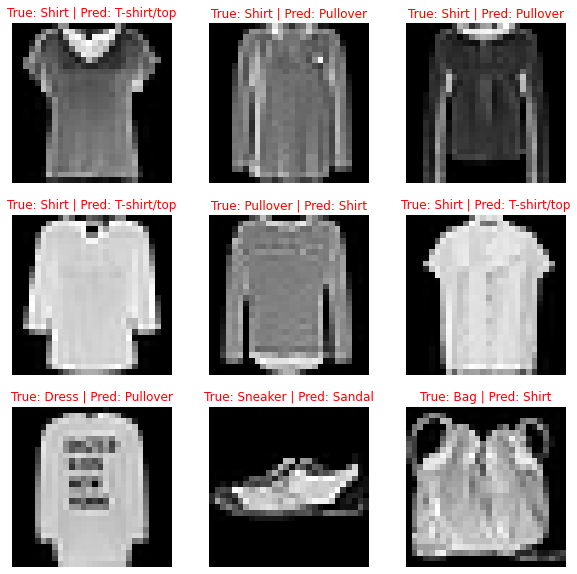

In [ ]:
# select 9 random wrong samples predictions and plot them 
import random 
random_samples = random.sample(list(wrong_indexes),k=9)
#print(random_samples)
#print(test_fashion_data[random_samples[0]][1])
#print(test_fashion_data[0][0].shape)
#print(test_pred_labels[random_samples[0]])
plt.figure(figsize=(10,10))
for i, idx in enumerate(random_samples):
  true_label = class_names[test_fashion_data[idx][1]]
  pred_label = class_names[test_pred_labels[idx]]

  plt.subplot(3,3,i+1)
  plt.imshow(test_fashion_data[idx][0].squeeze(),cmap='gray')
  plt.title(f'True: {true_label} | Pred: {pred_label}', c='r')
  plt.axis(False)

In [156]:
#plot confusion matrix 
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names))
confmat_tensor = confmat(preds = test_pred_labels,
                         target=test_fashion_data.targets)
confmat_tensor

tensor([[900,   0,  11,  12,   2,   1,  67,   0,   7,   0],
        [  3, 979,   0,  15,   2,   0,   0,   0,   1,   0],
        [ 29,   1, 860,   4,  65,   0,  41,   0,   0,   0],
        [ 48,   5,  18, 867,  21,   0,  39,   0,   1,   1],
        [  2,   3,  93,  39, 806,   0,  57,   0,   0,   0],
        [  0,   0,   0,   0,   0, 977,   0,  12,   2,   9],
        [154,   3,  75,  22,  81,   0, 654,   0,  11,   0],
        [  0,   0,   0,   0,   0,  15,   0, 949,   1,  35],
        [  5,   2,   3,   4,   4,   1,   4,   2, 974,   1],
        [  0,   0,   0,   0,   0,   7,   1,  26,   1, 965]])

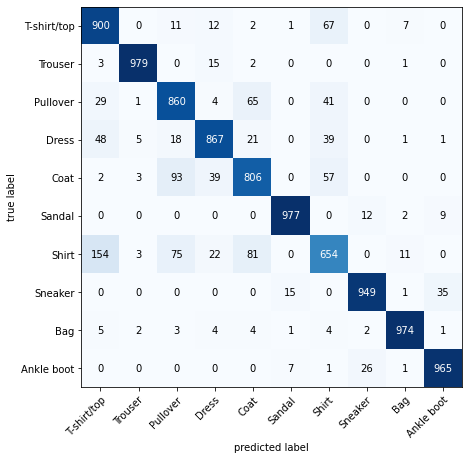

In [157]:
# plot the confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names  = class_names,
                                figsize = (10,7))